Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multi-valued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Acceleration – continuous

Yr – Model of the car – Multivalued discrete

Mpg - Miles per gallon - continuous

 

Steps to follow:

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points
2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the data-set) – 5 points
3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)
4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
%matplotlib inline

In [2]:
data = pd.read_csv('cars-dataset.csv')
data.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [3]:
data.shape

(398, 8)

In [4]:
data.columns

Index(['car name', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [6]:
# CHeck for any null values
data.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [7]:
#Checking for any special characters/undesired data in the dataset
for i in data.columns:
    print(i,'=',pd.unique(data[i]))

car name = ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [9]:
data[data['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


In [10]:
data.drop(data[data.hp == '?'].index,inplace=True)
#df[df['Age'] < 25].index, inplace = True

In [11]:
data.shape

(392, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null object
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 27.6+ KB


In [13]:
data.hp = data.hp.astype('int64')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null int64
wt          392 non-null int64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


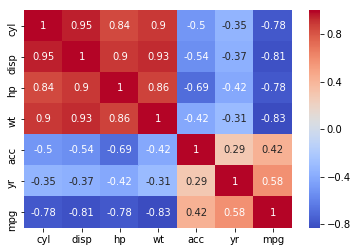

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [16]:
data.corr(method='kendall')

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.796611,0.686146,0.738015,-0.368486,-0.270179,-0.687444
disp,0.796611,1.000000,0.718471,0.799706,-0.353873,-0.219933,-0.678586
hp,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831,-0.679166
wt,0.738015,0.799706,0.703730,1.000000,-0.268563,-0.199813,-0.694243
acc,-0.368486,-0.353873,-0.488239,-0.268563,1.000000,0.198396,0.303146
yr,-0.270179,-0.219933,-0.277831,-0.199813,0.198396,1.000000,0.415247
mpg,-0.687444,-0.678586,-0.679166,-0.694243,0.303146,0.415247,1.000000


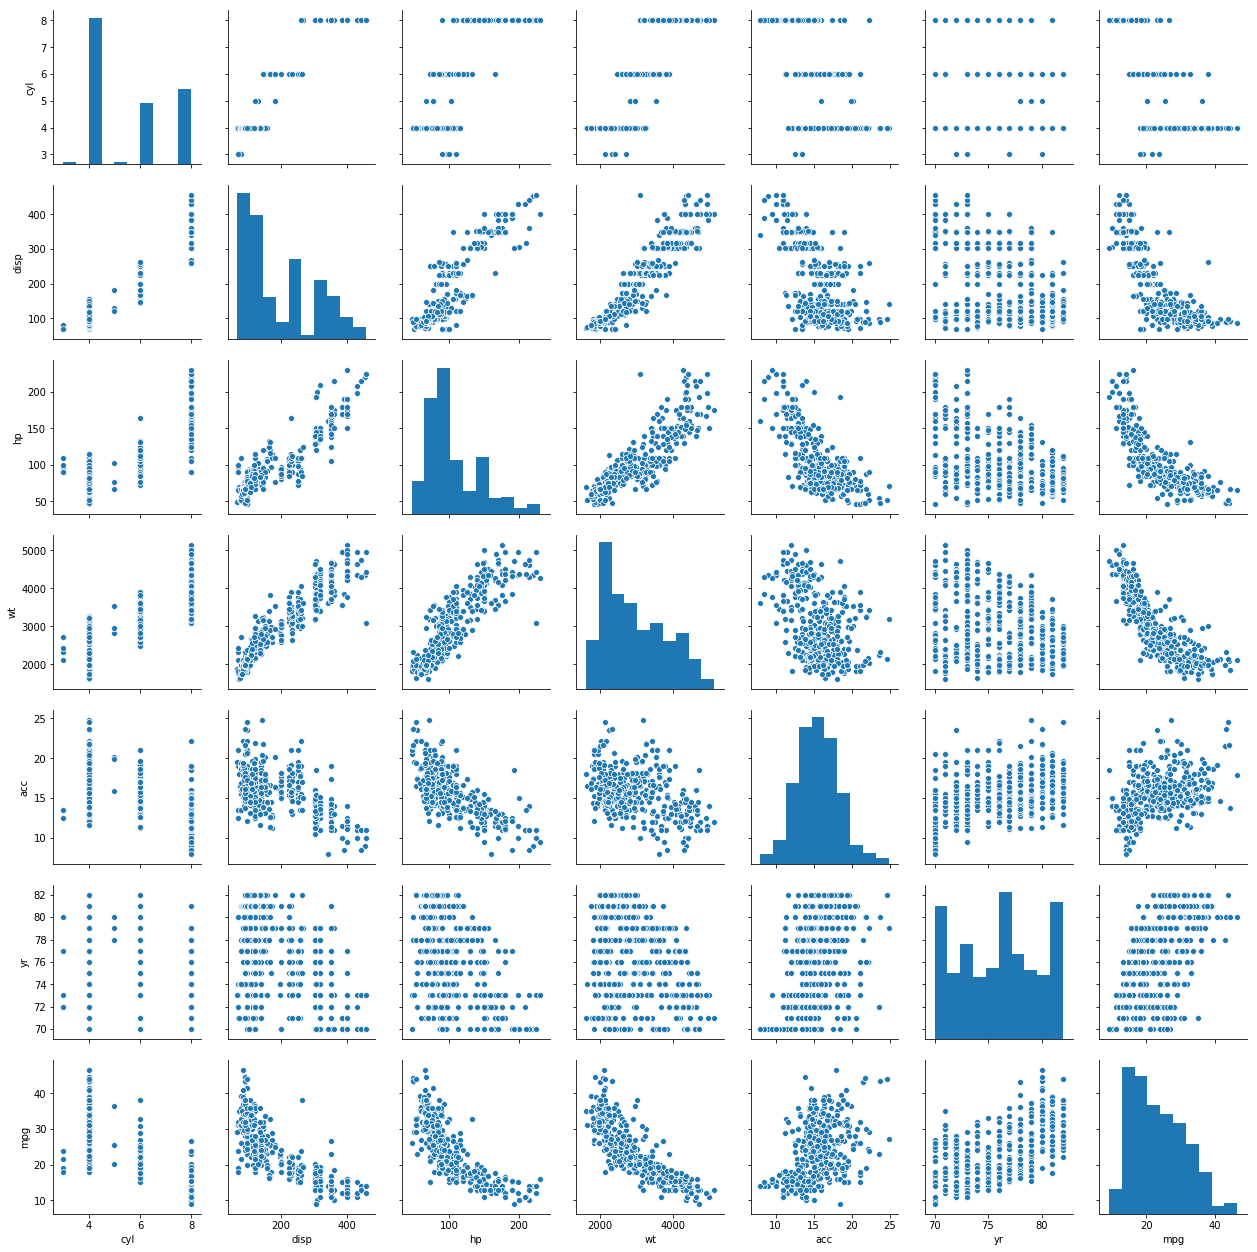

In [17]:
sns.pairplot(data)

In [18]:
# Observations
# From diagonal plots we can see origin has 3 points (evident from data)
# yr - shows two peaks majorily
# acc,mpg are nearly normal
# cyl and disp shows 3 clusters while wt shows 2

# from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
# (correlation too gives high negative correlation)
# Cyl too shows negative correlation with levels

# Dropping 1st column

In [19]:
X = data.drop('car name',axis=1)

In [20]:
X.shape

(392, 7)

In [21]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# statistics of scaled data
pd.DataFrame(data_scaled).describe().T

C:\Users\PratikDiablo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\PratikDiablo\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,count,mean,std,min,25%,50%,75%,max
0,392.0,-1.699321e-16,1.001278,-1.451004,-0.864014,-0.864014,1.483947,1.483947
1,392.0,-2.537653e-16,1.001278,-1.209563,-0.855532,-0.415384,0.778276,2.493416
2,392.0,-4.392745e-16,1.001278,-1.520975,-0.766593,-0.285349,0.560080,3.265452
3,392.0,5.607759e-17,1.001278,-1.608575,-0.886854,-0.205211,0.751093,2.549061
4,392.0,6.117555e-16,1.001278,-2.736983,-0.641055,-0.014999,0.538471,3.360262
5,392.0,-9.754102e-16,1.001278,-1.625315,-0.809884,0.005547,0.820978,1.636410
6,392.0,-1.840931e-16,1.001278,-1.853218,-0.826925,-0.089277,0.712514,2.970359


# K means (https://www.kaggle.com/fatmakursun/supervised-unsupervised-learning-examples)

In [22]:
data_scaled

array([[ 1.48394702,  1.07728956,  0.66413273, ..., -1.285258  ,
        -1.62531533, -0.69863841],
       [ 1.48394702,  1.48873169,  1.57459447, ..., -1.46672362,
        -1.62531533, -1.08349824],
       [ 1.48394702,  1.1825422 ,  1.18439658, ..., -1.64818924,
        -1.62531533, -0.69863841],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ..., -1.4304305 ,
         1.63640964,  1.09737414],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.11008813,
         1.63640964,  0.5842277 ],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.40043312,
         1.63640964,  0.96908753]])

In [23]:
from sklearn.cluster import KMeans
cluster_errors = []
cluster_range = range( 1, 10)
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, init='k-means++')
  clusters.fit(data_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2744.000000
1,2,1272.900760
2,3,928.916349
3,4,725.309400
4,5,656.209647
5,6,587.866158
6,7,534.433694
7,8,489.567531
8,9,447.015207


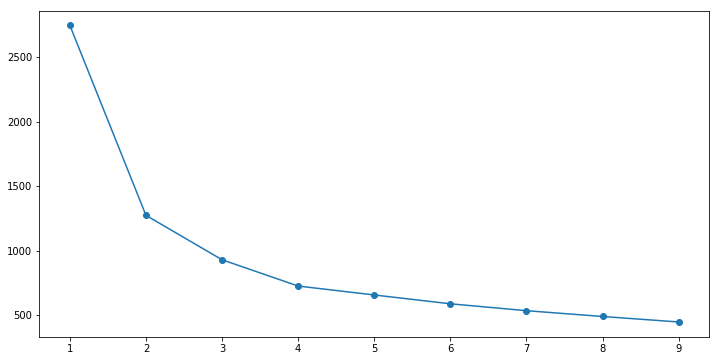

In [24]:
# Elbow plot to identify number of clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [25]:
cluster = KMeans( n_clusters = 4, init='k-means++' )
cluster.fit(data_scaled)
lab = cluster.predict(data_scaled)

In [26]:
# Check the number of data in each cluster

labels = cluster.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 89 100  94 109]


In [27]:
# Get the centroids.... using function cluster_centers_
centroids = cluster.cluster_centers_
print("Centroid values")
print(centroids) # From sci-kit learn

Centroid values
[[ 0.41549305  0.30031222 -0.03530064  0.34141577  0.30633818  0.06662814
  -0.49265912]
 [-0.85814365 -0.80247472 -0.55744679 -0.75309477  0.3207127  -0.63048922
   0.2066802 ]
 [ 1.48394702  1.48913886  1.50679413  1.39145217 -1.0759934  -0.68265368
  -1.1566489 ]
 [-0.83170217 -0.79320521 -0.75919461 -0.78782597  0.38355974  1.1127382
   1.21012512]]


In [28]:
# Let us put the raw centroid values into a dataframe under respective columns
centroid_df = pd.DataFrame(centroids, columns = list(X))
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,0.415493,0.300312,-0.035301,0.341416,0.306338,0.066628,-0.492659
1,-0.858144,-0.802475,-0.557447,-0.753095,0.320713,-0.630489,0.206680
2,1.483947,1.489139,1.506794,1.391452,-1.075993,-0.682654,-1.156649
3,-0.831702,-0.793205,-0.759195,-0.787826,0.383560,1.112738,1.210125


In [29]:
lab = cluster.labels_ 
lab

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 3, 0,
       0, 0, 0, 1, 3, 1, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 3, 3, 3, 1, 3, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 1,
       3, 3, 3, 3, 3, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       3, 3, 3, 3, 1, 1, 1, 1, 0, 0, 1, 0, 3, 3, 0, 0, 3, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 2, 3, 3, 3, 3, 0, 0, 3, 0, 3, 3,

In [30]:
X_df = pd.DataFrame(X)
X_df['labels'] = cluster.labels_ 
X_df.groupby(["labels"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
labels,,,,,,,
0,89,89,89,89,89,89,89
1,100,100,100,100,100,100,100
2,94,94,94,94,94,94,94
3,109,109,109,109,109,109,109


<Figure size 720x504 with 0 Axes>

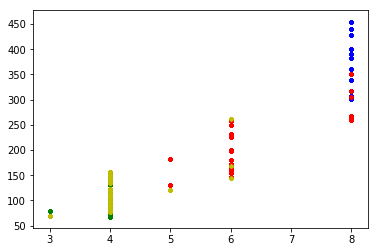

In [32]:
plt.figure(figsize=(10,7))
colors = ['r', 'g', 'b','y']
fig, ax = plt.subplots()
c = np.array([2,2])

for i in labels:
        points = np.array(X_df.loc[X_df['labels'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

# Linear Regression

In [33]:
# independant variables
X = X_df.drop(['mpg'], axis=1)
# the dependent variable
y = X_df[['mpg']]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=101) 

In [35]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression() 
lm.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
predictions=lm.predict(x_test) 

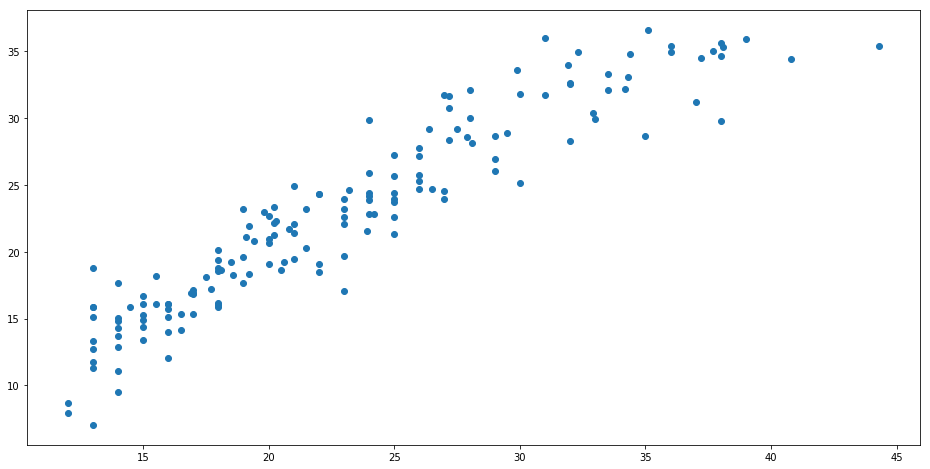

In [38]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,predictions)
plt.show()

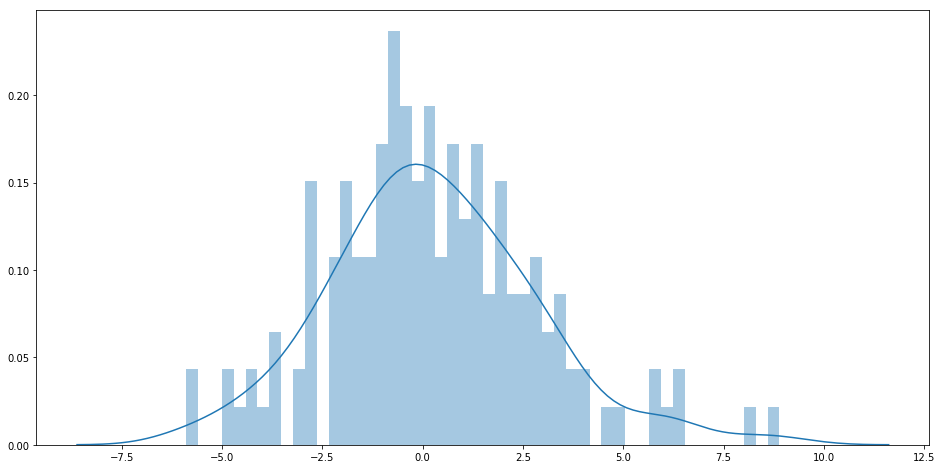

In [39]:
plt.figure(figsize=(16,8))
sns.distplot((y_test-predictions),bins=50)
plt.show()

In [40]:
lm.coef_

array([[ 2.29460349e-01,  8.10854349e-04, -2.01210473e-02,
        -6.06730567e-03,  1.88487412e-01,  5.28488685e-01,
         1.85510098e+00]])

In [41]:
lm.intercept_

array([-3.89917642])

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.8774609780961969